In [124]:
from extract import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
_columns = ['_date','cumstomer',"transaction_id",'product_id', 'quantity']
df_input = pd.DataFrame(data=data,columns =_columns)
df_input.product_id.value_counts()
df_input['_date'] = pd.to_datetime(df_input['_date'],format = '%Y-%m-%d')
df_input[["quantity"]] = df_input[["quantity"]].apply(pd.to_numeric)

In [90]:
agg_customers = df_input \
    .groupby("cumstomer") \
    .agg(
        transaction_count=("transaction_id","count"),
        quantity=("quantity","sum")
    )
    # .sort_values(by='quantity',ascending=False).quantity
agg_customers.idxmax()
agg_customers.nlargest(n=10,columns='quantity')

', '.join(agg_customers \
    .quantity[
        agg_customers.quantity
        >=agg_customers.quantity.quantile(interpolation='higher')
        ] \
    .index\
    .tolist())

'Alexey_Fedorov, Alexey_Smirnov, Anton_Ivanov, Anton_Petrov, Anton_Smirnov, Kirill_Fedorov, Petr_Fedorov, Petr_Ivanov, Petr_Smirnov, Rostislav_Petrov, Vasiliy_Ivanov'

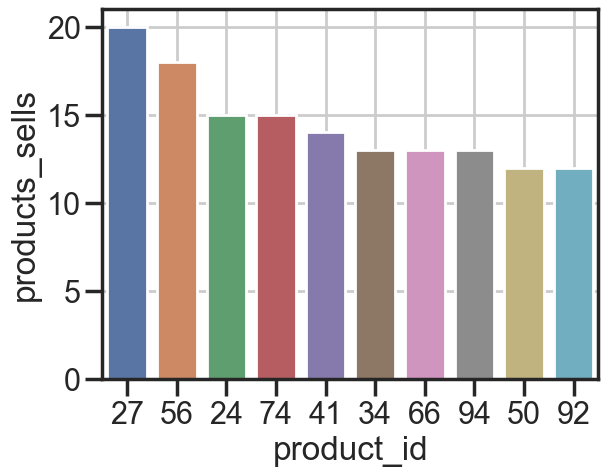

In [153]:
top_sells = df_input \
    .groupby('product_id',as_index=False) \
    .agg(products_sells =('quantity',"sum")) \
    .nlargest(n=10,columns='products_sells')
sns.barplot(data=top_sells,x='product_id',y='products_sells',alpha=1,)
plt.grid(linewidth=2)



# analyse


<Axes: xlabel='_date'>

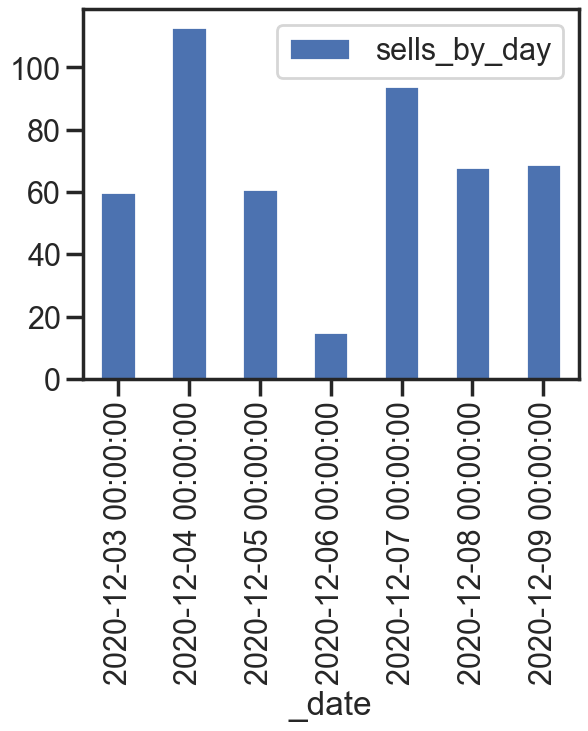

In [181]:
df_input.\
    groupby("_date") \
    .agg(
    sells_by_day = ('quantity','sum')
    ) \
    .plot(kind="bar")

In [184]:
df_input. \
    groupby(['product_id','cumstomer']) \
    .agg({"_date":pd.Series.nunique}) \
    .query('_date >1')

,,_date
product_id,cumstomer,
15,Anton_Ivanov,2
94,Petr_Fedorov,2
